In [24]:
import numpy as np
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

%matplotlib inline

Let’s generate a handful of random points.

Text(5.6, 2.660894955803764, '$(x_5, y_5)$')

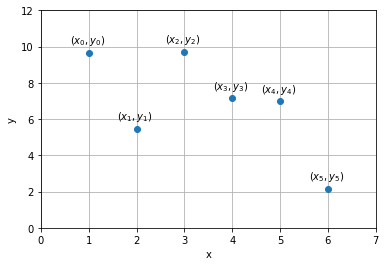

In [25]:
np.random.seed(4)

x = np.arange(1, 7)
y = 10 * np.random.rand(6)

plt.plot(x, y, 'o')
plt.grid(True)
plt.xlim(0, 7)
plt.ylim(0, 12)
plt.xlabel('x')
plt.ylabel('y')

plt.annotate('$(x_0, y_0)$', (x[0] + -0.4, y[0] + 0.5) )
plt.annotate('$(x_1, y_1)$', (x[1] + -0.4, y[1] + 0.5) )
plt.annotate('$(x_2, y_2)$', (x[2] + -0.4, y[2] + 0.5) )
plt.annotate('$(x_3, y_3)$', (x[3] + -0.4, y[3] + 0.5) )
plt.annotate('$(x_4, y_4)$', (x[4] + -0.4, y[4] + 0.5) )
plt.annotate('$(x_5, y_5)$', (x[5] + -0.4, y[5] + 0.5) )

In general, if we have $N+1$ points, we can find an $N$th order polynomial that passes though all those points.

Since we have six points, we want to find a 5-th order polynomial the passes though all of our points.,
$$y = \alpha_0 + \alpha_1  x +  \alpha_2 x^2 + \alpha_3 x^3 + \alpha_4 x^4 + \alpha_5 x^5$$

So, we have six unknowns, but also six equations:
\begin{array}{ll}
y_0 = & \alpha_0 + \alpha_1  x_0 +  \alpha_2 x_0^2 + \alpha_3 x_0^3 + \alpha_4 x_0^4 + \alpha_5 x_0^5 \\
y_1 = & \alpha_0 + \alpha_1  x_1 +  \alpha_2 x_1^2 + \alpha_3 x_1^3 + \alpha_4 x_1^4 + \alpha_5 x_1^5 \\
y_2 = & \alpha_0 + \alpha_1  x_2 +  \alpha_2 x_2^2 + \alpha_3 x_2^3 + \alpha_4 x_2^4 + \alpha_5 x_2^5 \\
y_3 = & \alpha_0 + \alpha_1  x_3 +  \alpha_2 x_3^2 + \alpha_3 x_3^3 + \alpha_4 x_3^4 + \alpha_5 x_3^5 \\
y_4 = & \alpha_0 + \alpha_1  x_4 +  \alpha_2 x_4^2 + \alpha_3 x_4^3 + \alpha_4 x_4^4 + \alpha_5 x_4^5 \\
y_5 = & \alpha_0 + \alpha_1  x_5 +  \alpha_2 x_5^2 + \alpha_3 x_5^3 + \alpha_4 x_5^4 + \alpha_5 x_5^5 
\end{array}

Or in matrix form,
$$
\begin{pmatrix}
y_0 \\
y_1 \\
y_2 \\
y_3 \\
y_4 \\
y_5
\end{pmatrix}
=
\begin{pmatrix}
x_0^0 & x_0^1 & x_0^2 & x_0^3 & x_0^4 & x_0^5 \\
x_1^0 & x_1^1 & x_1^2 & x_1^3 & x_1^4 & x_1^5 \\
x_2^0 & x_2^1 & x_2^2 & x_2^3 & x_2^4 & x_2^5 \\
x_3^0 & x_3^1 & x_3^2 & x_3^3 & x_3^4 & x_3^5 \\
x_4^0 & x_4^1 & x_4^2 & x_4^3 & x_4^4 & x_4^5 \\
x_5^0 & x_5^1 & x_5^2 & x_5^3 & x_5^4 & x_5^5
\end{pmatrix}
\begin{pmatrix}
\alpha_0 \\
\alpha_1 \\
\alpha_2 \\
\alpha_3 \\
\alpha_4 \\
\alpha_5
\end{pmatrix}
$$

So solving for the unknown coefficients is simply a matter of solving the above equation.


In [26]:
#  Build our square matrix
A = np.stack( (x**0, x**1, x**2, x**3, x**4, x**5), axis = 1)

#  Solve via Numpy's linalg.solve command
alpha = np.linalg.solve(A, y)

#  Print the results
print(alpha)

[ 102.95426043 -189.20594542  131.81958552  -41.68200677    6.12458021
   -0.34017557]


Let's plot our polynomial to see that it indeed does go through our points.

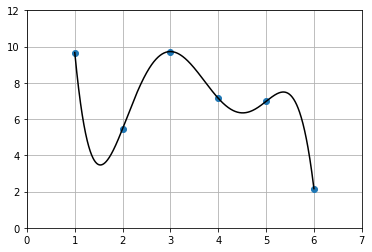

In [27]:
plt.plot(x, y, 'o')
plt.grid(True)
plt.xlim(0, 7)
plt.ylim(0, 12)

X = np.linspace(1, 6, 1000)
y1 = alpha[0] + alpha[1] * X + alpha[2] * X**2 + alpha[3] * X**3 + alpha[4] * X**4 + alpha[5] * X**5

plt.plot(X, y1, 'k')

##  Lagrange Polynomials

As I mentioned in the video, the above method is not particularly efficient computationally speaking.  In practice, one would use the formula for Lagrange interpolating polynomials to get the same result.
Here is the <a href="https://en.wikipedia.org/wiki/Lagrange_polynomial">Wikipedia article</A> on Lagrange polynomials  The formula is given below.

$$L(x) = \sum_{j = 0}^k y_j\ell_j(x)$$
where
$$\ell_j(x) = \prod_{\substack{0 \leq m \leq k\\ m \neq j}} 
\frac{x - x_m}{x_j - x_m}$$

Scipy has a built-in command to find the coefficients.  Let's verify it gives the same results as we comuted above.

[  -0.34017557    6.12458021  -41.68200677  131.81958552 -189.20594542
  102.95426043]


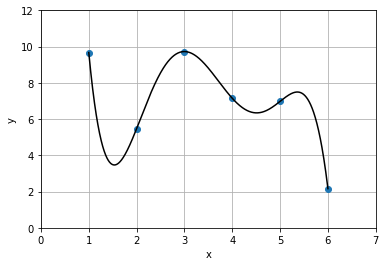

In [28]:
#  Replot our original data
plt.plot(x, y, 'o')
plt.grid(True)
plt.xlim(0, 7)
plt.ylim(0, 12)

#  Calculate the coefficients.  Note that they are returned in the reverse order to what we calculated above
L = lagrange(x, y)
L = Polynomial(L).coef
print(L)

#  Plot the results
plt.plot(X, np.polyval(L, X), 'k')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('plot1.png')

In practice, this method is not used much for interpolation, especially in the case of many data points where a high-order polynomial is needed.  The issues is that polynomials tend to have oscillatory behavior which can become extreme as we move to higher and higher order functions.  As an example, consider the case below where we try to use a 14th order polynomial to go through 15 data points.  There are extreme oscillation at either end.  It is much more common to use splines to do this type of interpolation which we will cover in a future video.

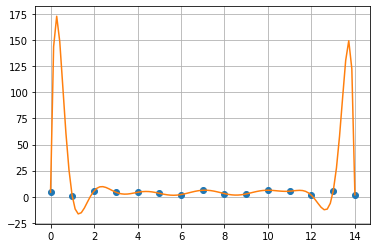

In [32]:
#  Generate and plot the points
np.random.seed(2)
x = np.arange(15)
y = 10 * np.random.rand(x.size)

plt.plot(x, y, 'o')

#  Calculate the polynomial coefficients
L = lagrange(x, y)
L = Polynomial(L).coef

#  plot the polynomial
X = np.linspace(0, 14, 100)
plt.plot(X, np.polyval(L, X))
plt.grid(True)